# 1차원 데이터

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('./data/ch2_scores_em.csv',index_col='student number') #.이 하나면 같은 폴더 ..면 상위폴더
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [2]:
scores=np.array(df.english)[:10] #'english'열의 값을 가져와서 numpy array로 변환한 뒤 , 첫 10개의 값을 추출
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [3]:
scores_df=pd.DataFrame({'score':scores},index=list('ABCEDFGHIJ'))
#numpy array인 scores를 이용하여 pandas DataFrame 객체인 scores_df 생성
#{'score':scores} : 'score'라는 열에 'scores'배열의 값들을 저장
#index=list('ABCDEFGHIJ') : 인덱스를 A부터 J 까지의 알파벳으로 설정

scores_df.head()

,score
A,42
B,69
C,56
E,41
D,57


In [4]:
# 위와 같은 내용+인덱스 열에 이름 부여 
scores_df=pd.DataFrame({'score':scores},
                      index=pd.Index(list('ABCDEFGHIJ'),name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [5]:
#평균값 - 배열

#방법 1
print(sum(scores)/len(scores))
#리스트 내 모든수의 합계(sum)를 리스트 내 아이템 갯수(len)로 나누어 평균값 구하기.

#방법 2
print(np.mean(scores)) 
#numpy의 mean 함수를 이용하여 평균값 구하기

55.0
55.0


In [6]:
#평균값 - 데이터프레임

scores_df.mean()

#data frame의 각 열에대한 평균값을 반환하기 때문에, 반환되는 값은 Series 데이터 타입.
#이렇게 계산된 평균값을 이용하여 다양한 분석 및 시각화 작업을 할 수 있다.

score    55.0
dtype: float64

In [7]:
#중앙값 (중간값)

#배열 
print(np.median(scores))

#데이터프레임
print(scores_df.median())

#배열은 함수 먼저 쓰고 데이터 프레임은 함수가 뒤에 오네.
#그리고 배열은 값만 나오고 데이터 프레임은 타입도 볼 수 있구만. 

56.5
score    56.5
dtype: float64


<AxesSubplot:ylabel='Frequency'>

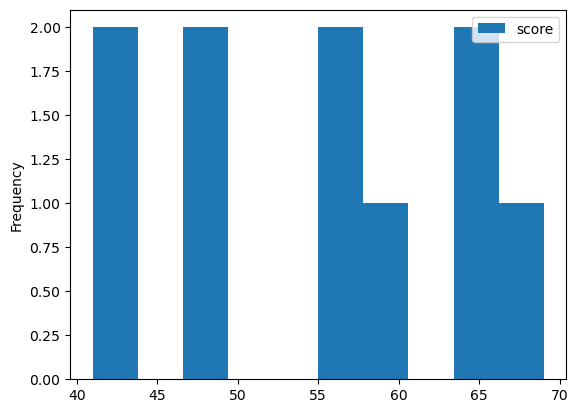

In [8]:
scores_df.plot(kind='hist')
#x축은 데이터 범위. y축은 해당 범위에 속한 데이터의 갯수

In [9]:
#정렬
sorted_scores=np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [10]:
#수동으로 중앙값 구하기 (값을 정렬한 후 리스트의 중간값 2개의 합 /2 )
(56+57)/2

56.5

In [11]:
# Q. 식으로 구하여라

#중앙값 계산 코드

n=len(sorted_scores) #sorted_scores 의 길이 (갯수)를 n에 저장

if n%2==0: #짝수. %=나머지를 구하는 식으로 a나누기 2의 나머지가 0인 경우(짝수) 찾기
    
    m0=sorted_scores[n//2-1] #중간 인덱스에서 1을 뺀 값을 m0에 저장 ★노이해
    m1=sorted_scores[n//2]  #인덱스 [n//2의 값을 m1에 저장
    
    #중간값을 구하기 위해서는 중간 인덱스를 구한 뒤
    median=(m0+m1)/2 #그 인덱스에 해당하는 두 값을 더한 후 2로 나눈다
    
    
else:
    median=sorted_scores[(n+1)//2-1]
    #(n+1)//2 는 중간 인덱스를 구하기 위한 계산식. 인덱스는 0부터 시작하므로 1을 더해준다.
    #그리고 2로 나누기 위해 // 연산자 사용.
median
    
    
#m0 에서 -1을 하는 이유: 인덱스가 0부터 시작하기 때문
#예를 들어, 만약 sorted_scores의 길이가 10이라면, 중간 인덱스는 4가 된다.
#따라서 중간값을 구하기 위해서는 1을 뺀 3번째 값과 4번째 값의 합을 2로 나눈다

56.5

In [12]:
#최빈값 : 빈도수가 가장 많은 것

scores_df.mode()

#mode(): 최빈값 구하는 메소드. => 가장 자주 등장하는 값을 계산하고 그 값을 반환해준다.
#최빈값이 여러개일 경우 모든 최빈값이 반환됨.

,score
0,65


In [13]:
pd.Series(sorted_scores).mode()

#시리즈로 바꿔서 할 수도 있다

0    65
dtype: int64

In [14]:
scores_df.describe() #통계 요약표

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


<AxesSubplot:xlabel='score', ylabel='Density'>

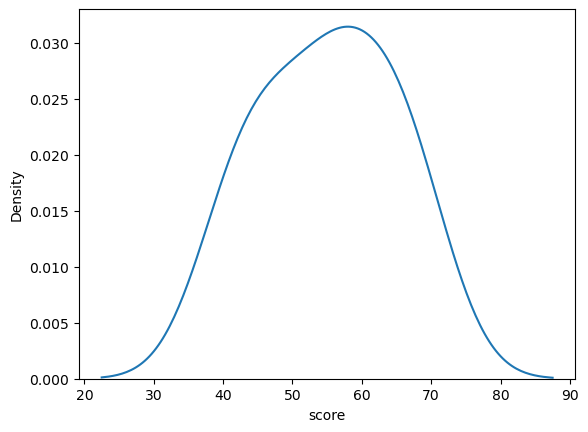

In [15]:
import seaborn as sns
sns.kdeplot(data=scores_df,x='score')

#kdfplot( 커널 밀도 추정 그래프) :  seaborn
#데이터셋의 확률 밀도 함수를 추정하는 데 사용. 데이터의 분포를 더욱 부드럽게 표현

#### 헷갈리는 어휘

<font color=blue>'데이터 분포가 치우친'</font>거랑 <font color=blue>'데이터값이 몰린'</font>거랑 의미가 다름.
- 꼬리가 오른쪽으로 길게 늘어져 있는건 -> 데이터 <font color=blue>분포</font>가 오른쪽으로 치우쳤다 
- 히스토그램에서 데이터들의 빈도(개수)가 앞쪽에 높게 돼 있는 건 -> 데이터<font color=blue>값</font>이 왼쪽으로 몰렸다

,score
count,10.000000
mean,79.200000
std,78.187524
min,41.000000
25%,48.250000
50%,56.500000
75%,65.000000
max,300.000000


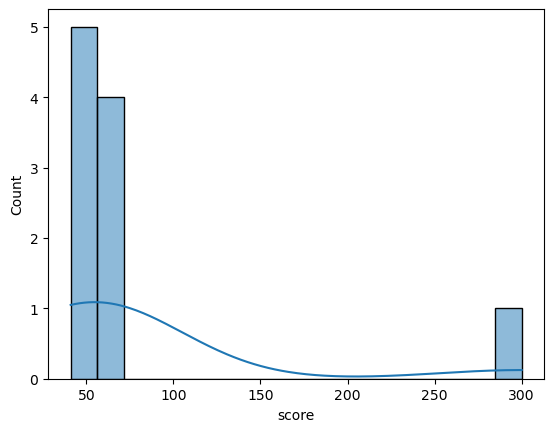

In [16]:
#평균값 > 중앙값

scores_df_b=scores_df.copy()
scores_df_b.iloc[9,0]=300  #마지막 행의 값으로 300을 만듦
sns.histplot(data=scores_df_b, x='score',kde=True) #score열을 x축으로 사용. kde(커널 밀도 추정 그래프)사용
scores_df_b.describe()

#극단적으로 큰 수가 있게 되면 평균이 중앙값보다 오른쪽에 있다.
#오른쪽으로 치우친 (skewed right) 분포는 작은 수가 왼쪽에 몰려있고 큰수가 우측으로 넓게 퍼져잇음


,score
count,10.000000
mean,49.300000
std,19.556471
min,1.000000
25%,43.500000
50%,52.500000
75%,63.000000
max,69.000000


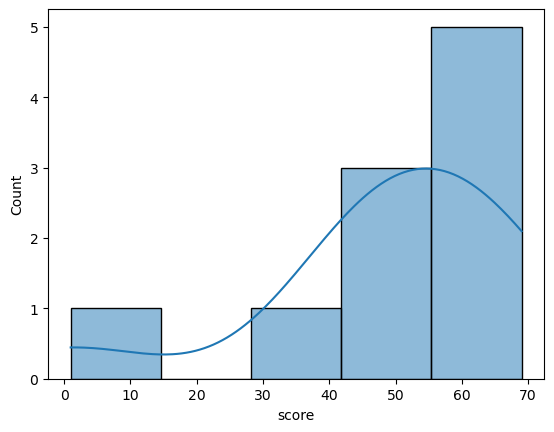

In [17]:
#평균값 < 중앙값

scores_df_a = scores_df.copy()
scores_df_a.iloc[9,0]=1
sns.histplot(data=scores_df_a,x='score',kde=True)
scores_df_a.describe()

# 극단적으로 작은 수인 1이 들어가면서 평균이 중앙값보다 작아진다. = 분포가 왼쪽으로 치우져진다.
#왼쪽으로 치우진 (skewed left) 분포는 수가 우측에 몰려있고 작은 수가 왼쪽으로 퍼져있다.

In [18]:
#데이터의 산포도 지표
#분산과 표준편차
#편차 (deviation)

mean=np.mean(scores)
print(mean)
print(scores)
deviation=scores-mean #deviation: 편차. 편차의 합은 항상 0이 된다
print(deviation) 

55.0
[42 69 56 41 57 48 65 49 65 58]
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [19]:
print(sum(deviation))
print(np.mean(deviation))

#편차의 합은 항상 0이 되니까 편차를 제곱을 해준다 (분산)
# 분산: 분산은 편차를 제곱한 값의 평균 (실제보다 과장됨)
#분산에 루트(√)를 씌워분게 표준편차 (=분산의 제곱근)  ex)√4=2

0.0
0.0


### 분산

- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산.
    - <font color=yellowgreen> Numpy는 표본분산,</font><font color=bluegreen>  Pandas는 불편분산</font>
    - Pandas에서 표본분산을 계산하려면 var메소드의 인수를ddof = 0 이라고 설정, 불편분산은 ddof=1일 때 해당됨. 

[표본분산이 분산을 과소평가하는 이유]
- <font color=violet>분산은 '데이터와 평균값 간의 거리'</font>이므로 모평균 간의 거리를 계산 :<font color=bluegreen> np.sum(fish_data-mu)**2) / M</font>
    <br>호수 안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4
    <br>샘플링 3마리{1,2,3} 표본평균 2. 
    <br>이때 <font color=violet>분산은 모평균을 모르기 때문에</font> 표본평균과의 거리를 계산하며 <font color=violet>분산을 과소평가</font>하게 된다. 
    <br>(표준편차를 비교해라)
- 표본분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.
- 불편분산: 편향되지 않게 조절해준다. (과소평가된걸 보완)

In [20]:
#넘파이 - 표본분산

np.mean(deviation**2) #deviation 자승한것의 평균 = 분산

86.0

In [21]:
np.var(scores) 

#var() : 분산을 계산하는 함수 
#분산은 각 데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 지표. ->얼마나 퍼져있는지 알 수 있다. 

86.0

In [22]:
#판다스 - 불편분산
scores_df.var()

score    95.555556
dtype: float64

### ddof
넘파이로 불편분산. 판다스로 표본분산 구할 때 ddof 사용하게 된다.
<br><font color=green>ddpf=0</font>  넘파이의 표본분산-><font color=green>불편분산</font> 
<br><font color=green>ddof=1</font>  판다스의 불편분산-><font color=green>표본분산</font> 

In [23]:
#넘파이- > 불편분산 : ddof=1
np.var(scores,ddof=1) #넘파이 : 함수먼저

95.55555555555556

In [24]:
#판다스 -> 표본분산 : ddof=0
scores_df.var(ddof=0) #판다스 : 함수가 뒤에 옴

score    86.0
dtype: float64

In [25]:
#표준편차

print(np.sqrt(np.var(scores,ddof=0))) #sqrt: 스퀘어 루트 =루트씌워주는 함수
print(np.std(scores,ddof=0))  #std:표준편차 구하는 식

9.273618495495704
9.273618495495704


In [26]:
#범위와 4분위
#범위 : 가장큰수 - 가장 작은 수

np.max(scores)-np.min(scores)

28

In [27]:
#4분위

scores_Q1=np.percentile(scores,25)  #25% . 1사분위 
scores_Q3=np.percentile(scores,75)  #75%   3사분위
scores_IQR=scores_Q3-scores_Q1
scores_IQR  
#IQR :  IQR(Interquartile Range, 사분위 범위). 데이터가 얼마나 퍼져있는지 보여주는 지표 준 하나
#IQR은 Q3 - Q1로 정의

15.0

### np.percentil()
데이터의 백분위를 계산해주는 함수. 
<br>ex1) np.percentile(data,25) = 25%. 25번째 백분위 수
<br>ex2) np.percentile(data,75) = 75%. 75번째 백분위 수

In [28]:
pd.Series(scores).describe() #scores를 pandas로 바꿔야 describe 확인 가능. 

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

### 데이터를 정규화하는 이유<br>
서로 다른 변수 간의 스케일 차이를 줄여줌으로써, 변수들이 가지는 중요도를 비교하기 쉬워지며, 모델의 성능을 향상시키는데 도움이 된다.<br>

- 데이터를 정규화하기 위해서는 여러 가지 방법이 있으며, 그 중 가장 일반적인 방법은 표준화(standardization)와 정규화(normalization)입니다.
-<font color=blue> 표준화</font>: 평균이 0, 표준편차가 1이 되도록 스케일을 맞춰주는 것.<span style="background-color:#6A5ACD"> z=(x-mean)/std</span>
- <font color=blue>정규화</font>: 데이터의 범위를 [0,1] 또는 [-1,1]로 맞춰주는 것.<span style="background-color:#6A5ACD">x_norm=(c-min)/(max-min)</span>

In [29]:
#데이터의 정규화 
#서로 다른 변수 간의 스케일 차이를 줄여줌으로써, 변수들이 가지는 중요도를 비교하기 쉽게 만들어 주는 것

print(scores)
print(f'평균: {scores.mean()}, 표준편차:{scores.std().round(4)}')

[42 69 56 41 57 48 65 49 65 58]
평균: 55.0, 표준편차:9.2736


In [30]:
#표준화  z_score

z=(scores-np.mean(scores))/ np.std(scores) #데이터에서 평균을 뺀것을 표준편차로 나눔.
z #평균이 0, 표준편차 1

#데이터-평균 부분 () 빼먹지 말 것. 

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [31]:
# 표준화를 거꾸로 
55.0+z*scores.std() #z에 표준편차를 곱해주고 평균을 더해줌

array([42., 69., 56., 41., 57., 48., 65., 49., 65., 58.])

### Z-score( normalized score)
데이터가 평균으로부터 얼마나 떻어져 있는지를 나타내는 표준화된 점수.
- <font color=violet>(데이터 - 평균)/표준편차.</font>
- z_score가 양수이면 평균보다 높고, 음수이면 평균보다 낮은 값.


In [32]:
#데이터의 시각화 

english_scores=np.array(df.english) #여기까지는 배열
pd.Series(english_scores).describe() #describe 보기위해 시리즈로 변경

#np.array 형태로 데이터를 추출 한 후 pandas의 Series타입으로 변환=>판다스의 describe() 통계요약 함수로 데이터 정보 출력

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [33]:
#도수 분포표

freq,_=np.histogram(english_scores,bins=10,range=(0,100))
#데이터를 0~100까지의 범위안의 10개의 구간으로 나누어 각 구간의 데이터를 계산.

freq

#최소값이 37이고 최대값이 79이므로 그 사이의 값들만 출력 
#30~40점 구간:2, 40~50점 구간: 8, 50~60점 구간:16, 60~70점 구간: 18, 70~80점 구간:6 개의 데이터가 속한다.



#freq: 각 구간에 속하는 데이터의 개수를 담을 리스트. 
#_: 각 구간의 경계값을 담은 리스트. 이 코드에서 '_'를 사용하지 않으므로 무시한다. 
#hitogram(): 입력으로 받은 리스트를 bins로 나누어 각 구간에 속하는 데이터의 개수를 계산.
#range=(0,100): 데이터 범위를 0~100점으로 제한

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

### np.histogram()
히스토그램은 데이터를 일정한 간격의 구간으로 나누어 각 구간에 속한 데이터의 갯수를 카운팅해 막대그래프로 나타낸다.
- 각 구간(bins)의 데이터 갯수를 반환

<AxesSubplot:ylabel='Count'>

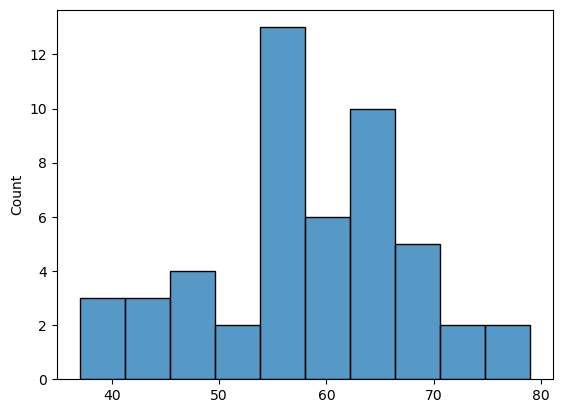

In [34]:
sns.histplot(x=english_scores,bins=10)

In [35]:
#도수 분포표(판다스)

#빈도분포의 구간을 나타내는 리스트생성
freq_class=[f'{i}~{i+10}'for i in range(0,100,10)]
#0~99까지 10씩 증가하는 숫자들의 범위에서 'for' 문을 돌며 문자열 생성
#ex) 'i=0' 일때는 '0~10'이라는 문자 생성 


freq_dist_df=pd.DataFrame({'frequency':freq},index=pd.Index(freq_class,name='class'))
#'freq'라는 데이터로 인덱스를 'freq_class'로하는 데이터프레임 생성.
#{'frequency':freq} : 딕셔너리형태로 데이터 지정. 'freq'데이터의 컬럼명을 frequency'로 설정,
#Index(freq_class,name='class'): 인덱스를 구간으로 설정하고 이름을 'class'로 지정

print(freq_class,'\n')
print(freq_dist_df)

['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100'] 

        frequency
class            
0~10            0
10~20           0
20~30           0
30~40           2
40~50           8
50~60          16
60~70          18
70~80           6
80~90           0
90~100          0


<AxesSubplot:xlabel='frequency', ylabel='Count'>

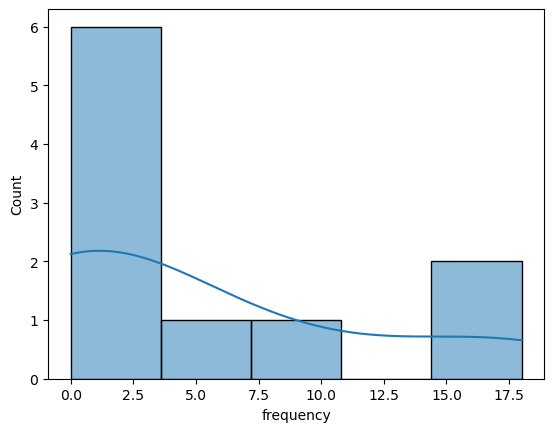

In [36]:
sns.histplot(data=freq_dist_df, x='frequency', kde=True)

#kde: [Kernel Density Estimate]. 히스토그램 그래프에 밀도함수를 그리는지 여부 설정. 
#kde=True 로 하면 밀도함수가 함께 그려짐.
#kde=False 로 하면 히스토그램만 그려짐 
#밀도함수: 확률변수의 분포를 나타내는 곡선 
#밀도함수가 큰 구간= 값이 나타날 확률이 큼.  정규분포의 밀도함수에서 중심에 가까운 값일수록 값이 큼. 

In [37]:
#계급값: 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨.
# 0부터 90까지 10씩 증가하는 숫자들의 중심값(class value)을 계산하는 코드

class_value=[(i+(i+10))//2 for i in range(0,100,10)]
#0~90까지 10씩 증가하는 숫자들에 대해 해당 숫자와 그 다음 숫자의 합을 구한다
#ex:0과 10의 중심값은 (0+10)//2 = 5. 10과 20의 중심값은 15이므로, (10+20)//2 = 15
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [38]:
#상대도수: 해당구간이 전체에서 차지하는 비율 
#각 구간의 도수를 전체도수의 합으로 나눈값. = 해당구간이 전체에서 차지하는 비율 
#ex) 0~10까지 구간의 도수가 10이고 전체가 100이면 10/100=0.1, 해당 구간이 전체에서 10%의 비율을 차지하고 있다는 뜻. 
#도수: 해당 구간의 데이터 갯수

rel_freq=freq/freq.sum() 
rel_freq

#freq: 어떤 데이터의 도수분포표에서 각 구간에 속하는 데이터의 빈도수
#freq.sun() : freq리스트의 합. =데이터의 총 빈도수 
#rel_freq : freq / 총빈도수 = 각 구간의 상대도수
#4번 구간의 상대도수가 0.04 이므로 4%가 4번 구간에 속한다는 뜻. 5번 구간은 16%...

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [39]:
#누적 상대도수 : 해당 계급까지의 상대도수의 합. cum_rel_freq = 누계
cum_rel_freq=np.cumsum(rel_freq)
cum_rel_freq


# rel_freq : 도수분포표에서 각 구간의 상대도수를 나타내는 리스트
# np.cumsum() : 리스트의 누적합을 구한다. 
# 이 누적 상대도수는 각 구간 이하의 상대도수의 합.
# ex1) 1번~5번구간의 누적 상대도수 = 0.04+0.16=0.20 이므로 데이터중 20%가 4번부터 5번 구간 까지에 속한다.
# ex2) 1번~6번까지의 누적 상대도수= 0.04+0.16+0.32 = 0.52 데이터중 52%가 1번~6번 구간 까지에 속한다. 

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [40]:
#각 구간의 계급값, 도수, 상대도수, 누적 상대도수를 계산하는 코드

freq_dist_df['class_value']= class_value  #class_value: 각 구간의 계급값
#freq_dist_df: 도수분포표 df. / freq_dist_df['']: 컬럼명

freq_dist_df['relative_frequency']=rel_freq #rel_freq: 각 구간의 상대도수

freq_dist_df['cumulative_frequency']=cum_rel_freq #cum_rel_freq : 각 구간까지의 누정 상대도수
freq_dist_df=freq_dist_df[['class_value','frequency','relative_frequency','cumulative_frequency']]
#특정 열만 선택하여 데이터프레임 재구성 
freq_dist_df
#ex)30~40구간의 계급값 35, 도수 2, 상대도수 0.04, 누적상대도수 0.04 가 된다. 


#각 구간은 계급값,   도수,       상대도수,     누적 상대도수

,class_value,frequency,relative_frequency,cumulative_frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [41]:
#위 그래프의 최빈값 구하기.
#도수가 가장 큰 구간의 계급을 찾는 코드.

freq_dist_df.loc[freq_dist_df.frequency.idxmax(),'class_value']

#idxmax() : 데이터프레임에서 가장 큰 값을 가진 인덱스 반환= frequency열에서  가장 큰 값의 인덱스 반환
#loc[]: 행과 열을 선택할 때 사용 ->여기서는 idxmax()가 반환한 인덱스에 해당하는 행을 선택
#class_velue 선택 이유: 도수가 가장 큰 구간의 계급값을 찾아서 반환한다. =가장 큰 도수(18)의 계급값 (65) 

65

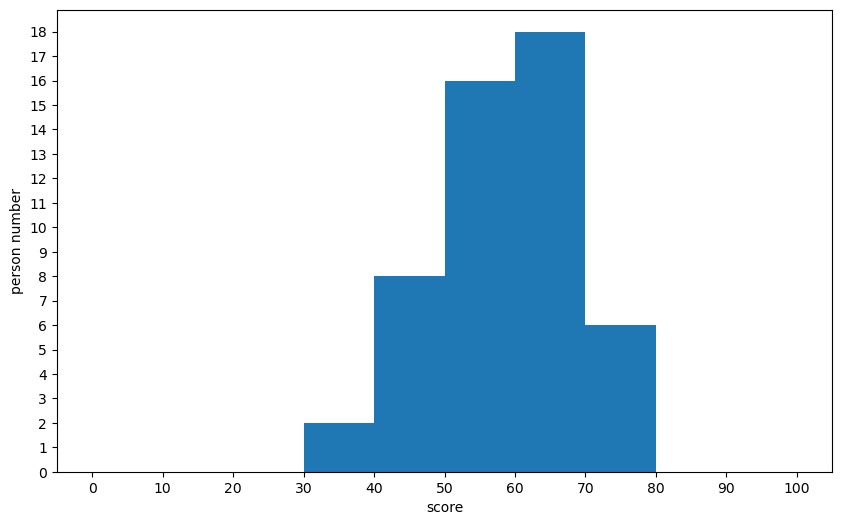

In [42]:
#히스토그램: 도수분포표를 막대그래프로 표현 (클래스가 x축, 각 구간의 빈도가 y)
#영어 점수 데이터의 히스토그램을 그리고, x축과 y축의 레이블 및 눈금을 설정

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

freq,_,_= plt.hist(english_scores,bins=10, range=(0,100)) #0~100까지 10개의 구간
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,100,10+1)) # np.linspace()함수는 시작점.끝점.구간수를 입력받아 선형적으로 분할 된 값 생성
plt.yticks(np.arange(0,freq.max()+1))
# y축 눈금을 0부터 가장 큰 빈도수까지 1씩 증가하도록 설정. 
# np.arange() 함수는 시작점과 끝점, 간격을 입력받아 값의 배열 생성
plt.show()

### np.linespace()

주어진 범위 내에서 균등 간격의 일련의 값을 생성.

- np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)  이런식으로 사용됨.
    - start : 시작값
    - stop : 끝값
    - num : 생성할 데이터 수 
    - endpoint: 끝값을 포함할지 여부. False로 설정하면 끝값을 생성하지 않는다. 
    - retstep: 반환값에 간격(step) 값을 포함할지 여부. True로 설정하면 생성된 데이터의 간격(step)값을 반환한다. 
    - dtype: 생성할 데이터의 자료형.생성할 데이터의 자료형을 설정가능. ex)dtype=int 을 적용시 정수형 데이터 출력 
    - axis: 배열의 축

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

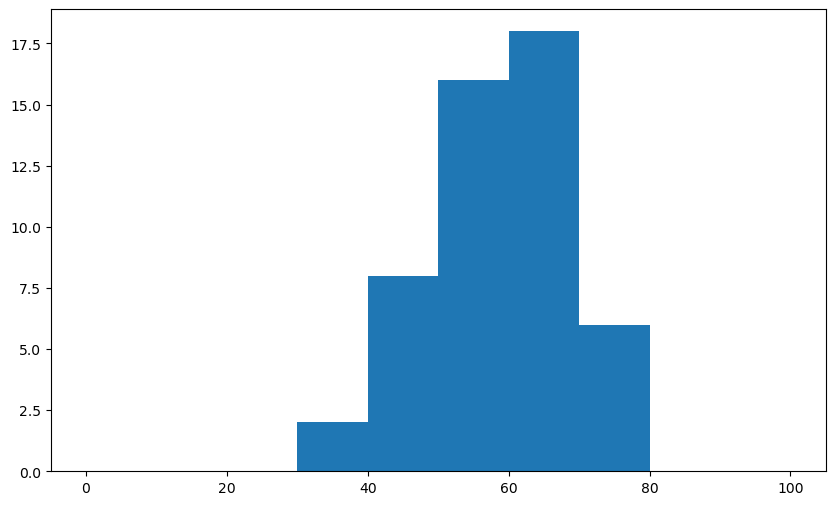

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(english_scores, bins=10, range=(0,100))

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.06 0.06 0.06 0.14
 0.16 0.12 0.2  0.1  0.04 0.02 0.   0.   0.   0.   0.  ]


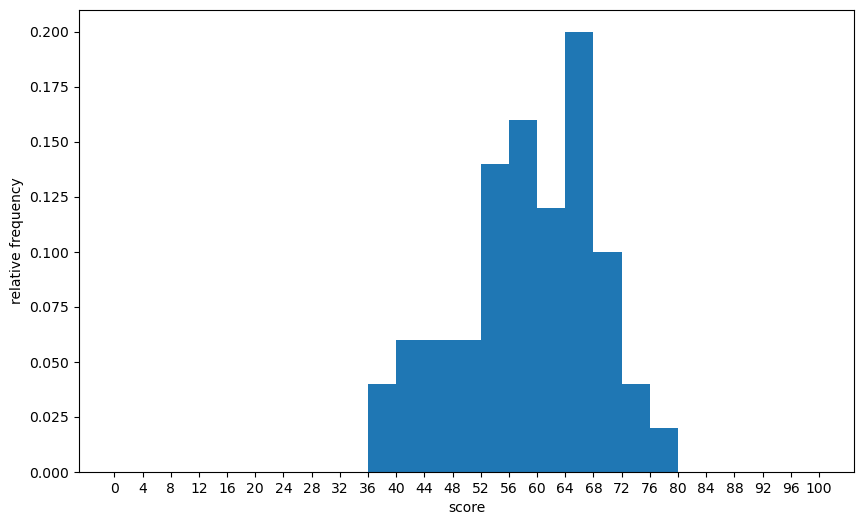

In [44]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)

weights=np.ones_like(english_scores) / len(english_scores)
rel_freq,_,_ = ax1.hist(english_scores,bins=25,
                       range=(0,100),weights=weights)

print(rel_freq)
ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))
plt.show()

### 과제1
클래스별 빈도를 나타내는 히스토그램을 추가하여 누적 상대도수 (y축 왼쪽)을 꺾은 선 그래프로 표현하세요.

[ 0.  0.  0.  2.  8. 16. 18.  6.  0.  0.]
[0.   0.   0.   0.04 0.2  0.52 0.88 1.   1.   1.  ]


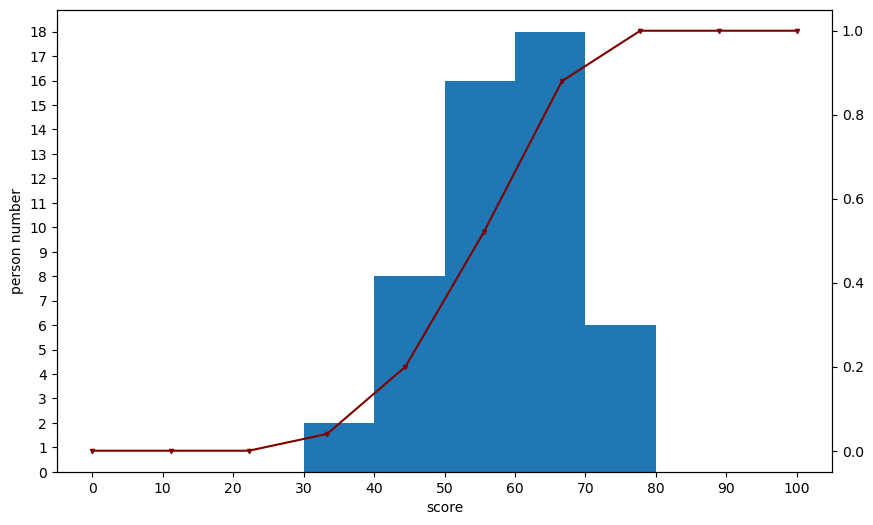

In [45]:
plt.figure(figsize=(10,6))
freq,_,_=plt.hist(english_scores, bins=10, range=(0,100))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,100,10+1)) #tickx= 눈금 구하기 
plt.yticks(np.arange(0,freq.max()+1))
###################################################### 이 위 쪽은 꾸미기. 순서가 바뀌니까 그래프가 변하네 왜지..  

ax=plt.twinx() #y축 분리된 그래프 따로 만들어서 합치기
x=np.linspace(0,100,10) 
y=cum_rel_freq
ax.plot(x,y,color='maroon',marker='v',markersize=3) #누적상태 보여주는 꺾은 선 그래프. 

print(freq)
print(y)

plt.show()


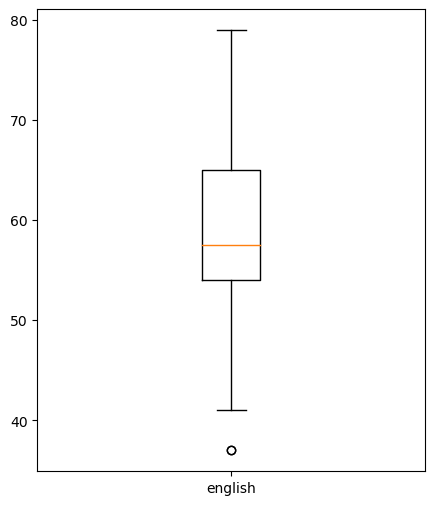

In [46]:
#box plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(5,6))
plt.boxplot(english_scores,labels=['english'])
plt.show()

In [47]:
english_scores=np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

### [과제2]
타이타닉 데이터셋에서 age,pclass,fare,sex,embarked 컬럼 중 2개를 선택하여 컬럼의 특징을 설명하고 종속변수인 survived와의 관계를 기술하세요.

- 각 컬럼에 대한 전처리 후 기초통계량 (연속형인 경우 해당. 범주형일 경우에는 다른방법 모색할것),
- 시각화를 통한 분포 및 특징 탐색. 이상치 여부 탐색
- 선택한 컬럼을 가장 잘 활용할 수 있는 형태로 변환

nulㅣ처리->이상치 탐색 ->박스플롯과 히스토플랏 보고 유난히 튀는 이상치는 삭제 가능. <br>
통계적으로 나온다고 해서 무조건 이상치라고 보면 안됨. 이상치는 에러가 있을 경우.  <br>
나이에서 이상치가 나올경우 어린사람이 밀집되어있다보니 고령자가 이상치로 인식될 수 있다.
현대그룹 회장의 급여가 현대그룹 인건비에 섞여있으면 이상치로 인식 된다.
하지만 이상치가 아니다. 

In [57]:
import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font',family='Malgun Gothic') #한글폰트
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 출력 설정

In [58]:
df=pd.read_csv('./dataset/titanic3.csv',encoding='euc-kr')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [59]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [60]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [61]:
df.corr() #상관계수 

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


## fare
- 평균 (33.295479)과 중앙값 (14.454200)의 차이가 큰 편
    - 특히 max값이 512.329200으로 평균과 차이가 많이 나는 것을 볼 수 있음.
    - 박스 플랏을 보면 upper whisker가 아주 많은 것을 볼 수 있다.
- 왼쪽으로 극적으로 치우쳐진 그래프
- 이상치 범위 : 66.34~
    - lower whisker는 없음 / upper whisker 만 171개

## age
- 평균 (29.892983)과 중앙값 (30)이 큰 차이가 없음.
- 최소, 최댓값을 고려하면 다소 치우친 그래프임을 알 수 있음.
- 이상치 범위 : ~ 0.44/ 57.34
    - 최고령자가 80이라는 걸 생각하면 이상치가 생각보다 많이 나옴.
- 주로 20~40대에 사람들이 많이 몰렸다는 것을 볼 수 있음. (상대도수 그래프 참고)

In [62]:
#나이 nan 처리 

df['age'].replace(np.nan, 1000, inplace=True) #age열의 누락값을 임의로 1000으로 바꿈.
ix = df['age']!=1000
ix2 = df['age']==1000
ix3 = df['sex']=='female'
ix4 = df['sex']=='male'

idx1 = df['name'].str.contains('Miss. ')   #미혼 여성
idx2 = df['name'].str.contains('Mrs. ')    #기혼 여성
idx3 = df['name'].str.contains('Dr. ')     #의사
idx4 = df['name'].str.contains('Master. ') #남자
idx6 = df['name'].str.contains('Mr. ')     #남자
idx7 = df['name'].str.contains('Ms. ')     #여자

miss = df['age'][idx1&ix].mean()
mrs = df['age'][idx2&ix].mean()
dr1 = df['age'][idx3&ix&ix3].mean()#  의사인데 NuN값의 여성 의 평균
dr2 = df['age'][idx3&ix&ix4].mean() #  의사인데 NuN값의 남성 의 평균
master = df['age'][idx4&ix].mean() # Master 인데 NuN값의 남성 의 평균
mr = df['age'][idx6&ix].mean() # 남성이면서 NuN값의 평균나이 
ms = df['age'][idx7&ix].mean() # 여성이면서 NuN값의 평균나이 


# 특정 조건에 앞서 계산한 해당 평균값 대입. 
df['age'][idx1&ix2] = miss
df['age'][idx2&ix2] = mrs
df['age'][idx3&ix2&ix3] = dr1  #의사이면서 나이가 1000인 여성(=누락값에 평균대입)
df['age'][idx3&ix2&ix4] = dr2  #의사이면서 나이가 1000인 남성
df['age'][idx4&ix2] = master
df['age'][idx6&ix2] = mr
df['age'][idx7&ix2] = ms

# 요금 nan처리

df.fare.replace(np.nan, df['fare'].mean(), inplace=True)
#fare의 누락된 값을 승객의 평균요금으로 대체.




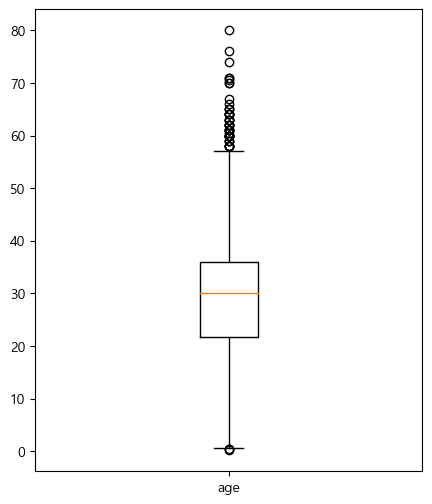

In [63]:
plt.figure(figsize=(5,6))
plt.boxplot(df.age,labels=['age'])
plt.show()

In [65]:
#이상치 탐색 방법 2가지

q1 = np.percentile(df.age,25)
q3 = np.percentile(df.age, 75)
IQR15 = (q3-q1)*1.5
abv = df[(df['age']<= q1-IQR15)| (df['age'] >= q3+IQR15)]

q1 = df.age.describe()['25%']
q2 = df.age.describe()['75%']
IQR = q3-q1
abv = df[(df['age']<= q1-(IQR*1.5))|(df['age']>=q3+(IQR*1.5))]

print(f"이상치: ~{(q1-(IQR*1.5)).round(2)}/{(q3+(IQR*1.5)).round(2)}~")
len(abv)

#단, 이상치 개수가 많은 편이고, 부적절한 데이터라 생각될 정도의 이상치도 아니므로
#삭제 처리는 하지 않음.
#그냥 타이타닉 평균 나이대 등을 파악할 때 참고하는 정도. 


이상치: ~0.44/57.34~


52

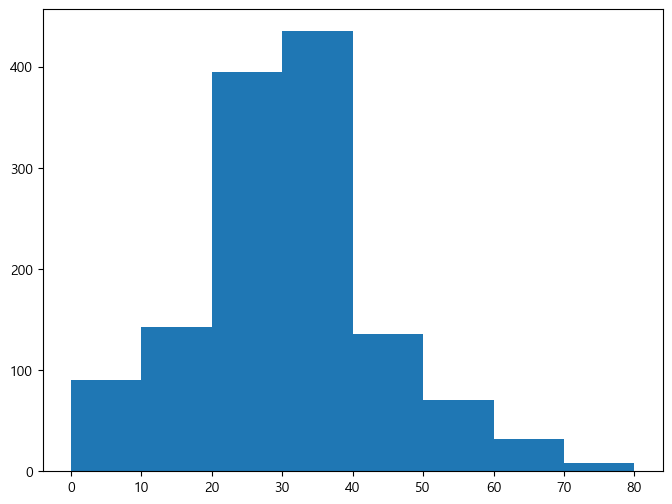

In [66]:
plt.figure(figsize=(8,6))
freq,_,_ = plt.hist(df.age, bins=8, range=(0,80))

freq,_ = np.histogram(df.age, bins=8, range=(0,80)) 
#각 구간의 값 개수 count

In [68]:
dfage=pd.DataFrame() #빈 데이터프레임 생성 

dfage['class_v'] = [(i+(i+10))//2 for i in range(0,80,10)] #계급값
# 0부터 80까지 10단위로 설정을 구성, 각 구간의 최저값을 계산해서 표시

freq,_ = np.histogram(df.age, bins=8, range=(0,80)) #각 구간 값 개수 count
dfage['frequency']=freq #각 계급별 빈도수(개수)

dfage['rel_freq']=freq/freq.sum() #상대도수(해당 계급 데이터의 상대적인 비율)
dfage['cum_freq']= np.cumsum(dfage.rel_freq) # 누적 상대도수

dfage

,class_v,frequency,rel_freq,cum_freq
0,5,90,0.068755,0.068755
1,15,143,0.109244,0.177998
2,25,395,0.301757,0.479756
3,35,435,0.332315,0.812070
4,45,136,0.103896,0.915966
5,55,70,0.053476,0.969442
6,65,32,0.024446,0.993888
7,75,8,0.006112,1.000000


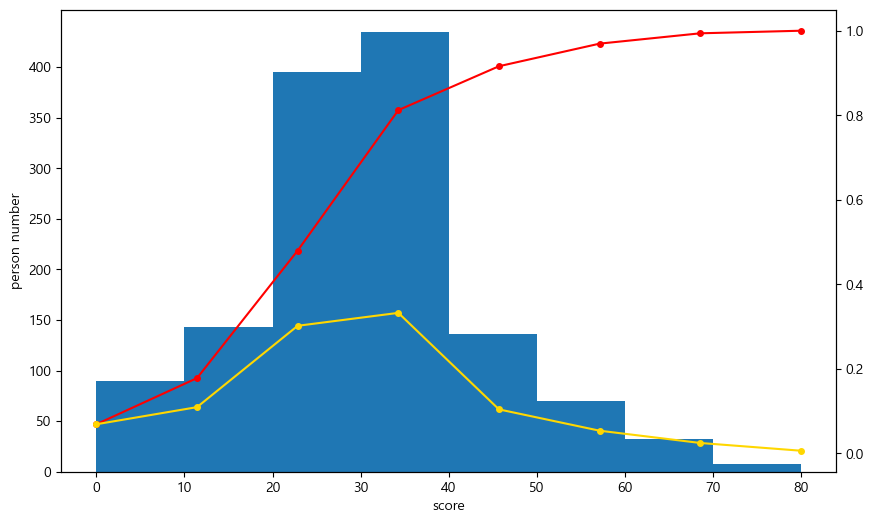

In [69]:
plt.figure(figsize=(10,6))

freq,_,_ = plt.hist(df.age, bins=8,range=(0,80))

plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,80,8+1))
plt.yticks(np.arange(0,freq.max()+1, 50))

ax2=plt.twinx()
x=np.linspace(0,80,8)
y=dfage['cum_freq']
ax2.plot(x,y,color='red',marker='o', markersize=4) #누적상대도수

plt.plot(x,dfage.rel_freq, color='gold', marker='o', markersize=4) #상대도수

plt.show()

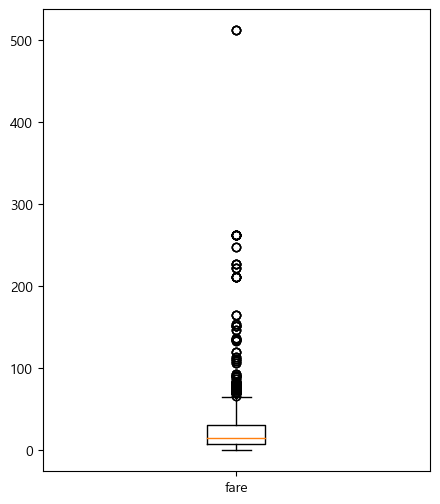

In [71]:
plt.figure(figsize=(5,6))
plt.boxplot(df.fare, labels=['fare'])
plt.show()

In [73]:
#이상치 탐색
q1 = np.percentile(df.fare,25)
q3 = np.percentile(df.fare,75)
IQR15 = (q3-q1)*1.5
abv = df[(df['fare'] <= q1-IQR) | (df['fare'] >= q3+IQR)]

print(f"이상치: ~{(q1-(IQR*1.5)).round(2)} / {(q3+(IQR*1.5)).round(2)}~")
len(abv)
# 이상치가 아주 많음
# 특히 upper whisker 범위가 너무 넓음

이상치: ~-13.44 / 52.61~


255

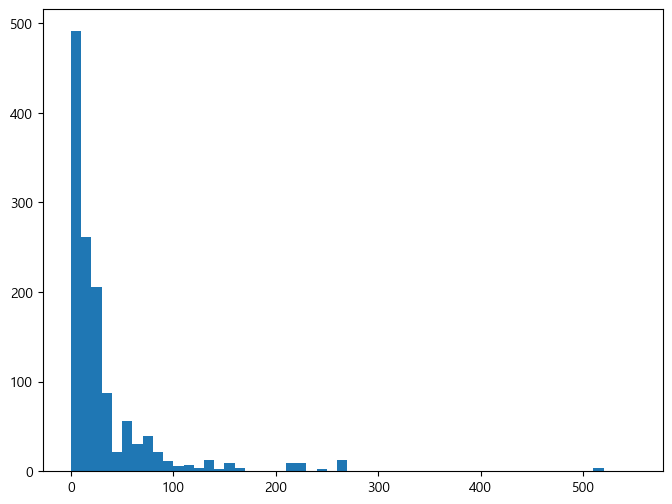

In [74]:
plt.figure(figsize=(8,6))
freq, _, _ = plt.hist(df.fare, bins=55, range=(0,550))

freq, _ = np.histogram(df.fare, bins=11, range=(0,550))   #각 구간 값 개수count

In [ ]:
dfare = pd.DataFrame()
dfare['calss_v'] = [(i+25) for i in range(0,550,50)]   #계급값

freq, _ = np.histogram(df.fare, bins=11, range=(0,550))   #각 구간 값 개수count
dfare['frequency'] = freq   #각 계급별 빈도수(개수)

dfare['rel_freq'] = freq/freq.sum()    #상대도수(해당 계급 데이터의 상대적인 비율)
dfare['cum_freq'] = np.cumsum(dfare.rel_freq)   # 누적 상대도수

dfare

In [ ]:
plt. figure(figsize=(10,6))

freq,_,_ = plt.hist(df.fare, bins=11, range=(0,550))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,550,11+1))
plt.yticks(np.arange(0,freq.max()+1,200))

ax2=plt.twinx()
x=np.linspace(0, 550, 11)
y=dfare['cum_freq']
ax2.plot(x,y, color='red', marker='o', markersize=4)    #누적상대도수

plt.plot(x, dfare.rel_freq, color='gold', marker='o', markersize=4)   #상대도수

plt.show()

# 초반에 극히 치우친 데이터

In [ ]:
# 과제(3): 타이타닉에서 2개 선택, 공분산 행렬 및 상관계수 행렬 탐색
pclass = np.array(df['pclass'])
fare = np.array(df['fare'])
survived = np.array(df['survived'])

tt = pd.DataFrame({'pclass':pclass, 'fare':fare, 'survived':survived})
tt.head()

In [ ]:
# 과제(3): 타이타닉에서 2개 선택, 공분산 행렬 및 상관계수 행렬 탐색
pclass = np.array(df['pclass'])
fare = np.array(df['fare'])
survived = np.array(df['survived'])

tt = pd.DataFrame({'pclass':pclass, 'fare':fare, 'survived':survived})
tt.head()

In [ ]:
tdf = tt.copy()

tdf['pclass_deviation'] = tdf.pclass - tdf.pclass.mean()
tdf['fare_deviation'] = tdf.fare - tdf.fare.mean()
tdf['survived_deviation'] = tdf.survived - tdf.survived.mean()

tdf['pclass: pod'] = tdf['pclass_deviation']*tdf['survived_deviation']
tdf['fare: pod'] = tdf['fare_deviation']*tdf['survived_deviation']
#두 편차를 곱한 값 -> 공분산

tdf.head()

In [ ]:
tdf['pclass: pod'].mean()
tdf['fare: pod'].mean()

In [ ]:
print(np.cov(pclass, survived, ddof=1))
np.cov(fare, survived, ddof=1)

In [ ]:
np.cov(pclass, survived, ddof=0)[0,1] / (np.std(pclass) * np.std(survived))
np.cov(fare, survived, ddof=0)[0,1] / (np.std(fare) * np.std(survived))

In [ ]:
np.corrcoef(pclass, survived)
np.corrcoef(fare, survived)

In [ ]:
tdf[['pclass','fare','survived']].corr()